In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

No GPU was detected. LSTMs and CNNs can be very slow without a GPU.


In [2]:
from tensorflow import keras

encoder=keras.models.Sequential([keras.layers.Dense(2,input_shape=[3])])
decoder=keras.models.Sequential([keras.layers.Dense(3,input_shape=[2])])
autoencoder=keras.models.Sequential([encoder,decoder])

autoencoder.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=0.1))

In [3]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [4]:
his=autoencoder.fit(X_train,X_train,epochs=20)
coding=encoder.predict(X_train)

Epoch 1/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3149
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2947
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2768
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2571
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2323
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2197
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1986
Epoch 8/20
2/2 [==============================] - 0s 996us/step - loss: 0.1942
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1741
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1582
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1434
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1348
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 

In [5]:
stackencoder=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(30,activation='selu')
    
])
stackdecoder=keras.models.Sequential([
    
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28])
    
])
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
stackae=keras.models.Sequential([stackencoder,stackdecoder])
stackae.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(lr=1.5))
his=stackae.fit(X_train,X_train,epochs=10,validation_data=(X_valid,X_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3805 - val_loss: 0.3179
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3078 - val_loss: 0.3012
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2991 - val_loss: 0.2980
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2951 - val_loss: 0.2940
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2920 - val_loss: 0.2914
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2910 - val_loss: 0.2897
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2887 - val_loss: 0.2890
Epoch 8/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2863 - val_loss: 0.2927
Epoch 9/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2866 - val_loss: 0.2872
Epoch 10/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.284

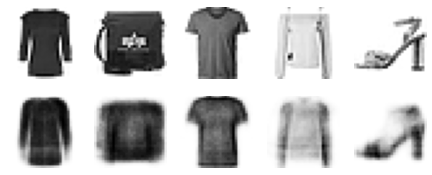

In [8]:
def plotimage(image):
    plt.imshow(image,cmap='binary')
    plt.axis('off')
def showrecon(model,n_image=5):
    recon=model.predict(X_valid[:n_image])
    fig=plt.figure(figsize=(n_image*1.5,3))
    for imageindex in range(n_image):
        plt.subplot(2,n_image,1+imageindex)
        plotimage(X_valid[imageindex])
        plt.subplot(2,n_image,1+n_image+imageindex)
        plotimage(recon[imageindex])
showrecon(stackae)

In [9]:
from sklearn.manifold import TSNE

xvalidcom=stackencoder.predict(X_valid)
tsne=TSNE()
xvalid2d=tsne.fit_transform(xvalidcom)

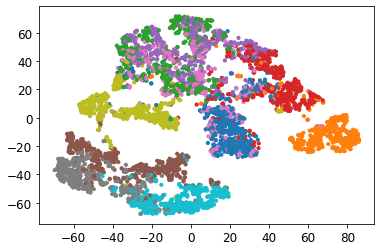

In [10]:
plt.scatter(xvalid2d[:,0],xvalid2d[:,1],c=y_valid,s=10,cmap='tab10')

In [13]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self,dense,activation=None,**kwargs):
        self.dense=dense
        self.activation=keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self,batchinputshape):
        self.biases=self.add_weight(name='bias',initializer='zeros',shape=[self.dense.input_shape[-1]])
        super().build(batchinputshape)
    def call(self,inputs):
        z=tf.matmul(inputs,self.dense.weights[0],transpose_b=True)
        return self.activation(z+self.biases)

In [14]:
dense1=keras.layers.Dense(100,activation='selu')
dense2=keras.layers.Dense(30,activation='selu')

tiedencoder=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    dense1,
    dense2
])
tieddecoder=keras.models.Sequential([
    DenseTranspose(dense2,activation='selu'),
    DenseTranspose(dense1,activation='sigmoid'),
    keras.layers.Reshape([28,28])
])
tiedae=keras.models.Sequential([tiedencoder,tieddecoder])

In [15]:
coding=30

gen=keras.models.Sequential([
    keras.layers.Dense(100,activation='selu',input_shape=[coding]),
    keras.layers.Dense(150,activation='selu'),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28])
])
dis=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(150,activation='selu'),
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
gan=keras.models.Sequential([gen,dis])

In [17]:
dis.compile(loss='binary_crossentropy',optimizer='rmsprop')
dis.trainable=False
gan.compile(loss='binary_crossentropy',optimizer='rmsprop')